<a href="https://www.kaggle.com/code/rinichristy/linear-regression-on-co2-emission-of-vehicles?scriptVersionId=92301763" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Simple Linear Regression (SLR) on Carbon dioxide emission of vehicles**

## **Table of Contents**

* [Data Exploration (EDA)](#EDA)
* [Model Development](#Model)
* [Model Evaluation](#Evaluation)


## **Importing the required packages**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

## **Dataset Information**
Datasets provide model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

**Model:**

* 4WD/4X4 = Four-wheel drive
* AWD = All-wheel drive
* FFV = Flexible-fuel vehicle
* SWB = Short wheelbase
* LWB = Long wheelbase
* EWB = Extended wheelbase

**Transmission:**
* A = automatic
* AM = automated manual
* AS = automatic with select shift
* AV = continuously variable
* M = manual
* 3 – 10 = Number of gears

**Fuel type:**
* X = regular gasoline
* Z = premium gasoline
* D = diesel
* E = ethanol (E85)
* N = natural gas

**Fuel consumption:** City and highway fuel consumption ratings are shown in litres per 100 kilometres (L/100 km) - the combined rating (55% city, 45% hwy) is shown in L/100 km and in miles per imperial gallon (mpg)

**CO2 emissions:** the tailpipe emissions of carbon dioxide (in grams per kilometre) for combined city and highway driving

**CO2 rating:** the tailpipe emissions of carbon dioxide rated on a scale from 1 (worst) to 10 (best)

**Smog rating:** the tailpipe emissions of smog-forming pollutants rated on a scale from 1 (worst) to 10 (best)


## **Load the Fuel Consumption dataset**

In [2]:
df = pd.read_csv("../input/2022-fuel-consumption-ratings/MY2022 Fuel Consumption Ratings.csv")
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


## **Data Exploration**<a name="EDA"></a>

In [3]:
df.dtypes

Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [5]:
df.duplicated().sum()

0

In [6]:
df.nunique()

Model Year                             1
Make                                  39
Model                                715
Vehicle Class                         14
Engine Size(L)                        36
Cylinders                              8
Transmission                          23
Fuel Type                              4
Fuel Consumption (City (L/100 km)    149
Fuel Consumption(Hwy (L/100 km))     107
Fuel Consumption(Comb (L/100 km))    131
Fuel Consumption(Comb (mpg))          49
CO2 Emissions(g/km)                  242
CO2 Rating                            10
Smog Rating                            5
dtype: int64

In [7]:
df['Model Year'].value_counts()

2022    946
Name: Model Year, dtype: int64

In [8]:
df['Engine Size(L)'].value_counts()

2.0    210
3.0    134
2.5     72
3.5     50
5.3     49
3.6     47
4.0     40
6.2     33
5.0     32
1.5     32
2.3     26
4.4     25
1.6     23
2.4     21
2.7     18
2.9     17
5.7     15
5.2     11
1.8      9
6.4      9
3.8      8
1.3      8
3.3      7
3.4      7
6.7      7
1.4      6
2.8      5
1.2      4
6.0      4
3.7      4
8.0      3
3.2      3
6.5      3
5.6      2
6.6      1
4.6      1
Name: Engine Size(L), dtype: int64

In [9]:
df['Cylinders'].value_counts()

4     404
6     295
8     197
3      21
12     17
10      8
16      3
5       1
Name: Cylinders, dtype: int64

In [10]:
df['CO2 Rating'].value_counts()

5     266
4     228
3     189
6     113
7      71
2      48
9      13
8      10
1       7
10      1
Name: CO2 Rating, dtype: int64

In [11]:
df['Smog Rating'].value_counts()

5    308
3    198
7    194
6    189
1     57
Name: Smog Rating, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


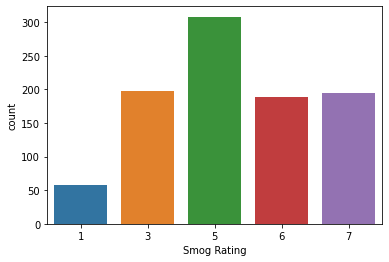

In [12]:
sns.countplot(df['Smog Rating']);

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


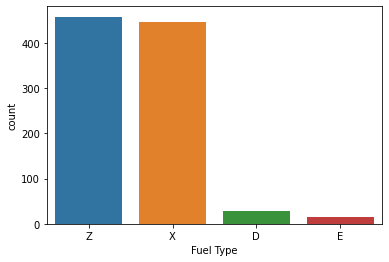

In [13]:
sns.countplot(df['Fuel Type']);

### **Descriptive Statistical Analysis**

In [14]:
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [15]:
df_fueltype = df.groupby(['Fuel Type'],as_index=False).mean()
df_fueltype

,Fuel Type,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,D,2022.0,2.964286,5.642857,11.282143,8.664286,10.117857,28.107143,271.571429,4.142857,2.500000
1,E,2022.0,4.457143,7.142857,19.864286,14.992857,17.692857,16.285714,294.857143,3.642857,4.285714
2,X,2022.0,2.877578,5.040359,11.225336,8.780269,10.124888,30.038117,237.580717,5.042601,5.730942
3,Z,2022.0,3.487336,6.235808,13.603930,9.801747,11.891703,24.812227,278.349345,4.100437,4.360262


Fuel type:
 X = regular gasoline; Z = premium gasoline; D = diesel; E = E85; 
 
E85 gas which is made up of between 51% and 83% ethanol blended with gasoline seems to have the highest CO2 emissions and subsequently lowest CO2 rating. Its fuel consumption is also very high in both city and highway. Regular gasoline seems to be fuel efficient both in terms of consumption and emission. 

In [16]:
df.corr()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Model Year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Size(L),NaN,1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,NaN,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),NaN,0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),NaN,0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),NaN,0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),NaN,-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),NaN,0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,NaN,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,NaN,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


In [17]:
df.drop(['Model Year'], axis = 1).corr()

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Engine Size(L),1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


In [18]:
df.drop(['Model Year'], axis = 1).corr().unstack().sort_values(ascending = False).drop_duplicates()

Engine Size(L)                     Engine Size(L)                       1.000000
Fuel Consumption (City (L/100 km)  Fuel Consumption(Comb (L/100 km))    0.990321
Fuel Consumption(Comb (L/100 km))  CO2 Emissions(g/km)                  0.971671
                                   Fuel Consumption(Hwy (L/100 km))     0.967138
CO2 Emissions(g/km)                Fuel Consumption (City (L/100 km)    0.965632
CO2 Rating                         Fuel Consumption(Comb (mpg))         0.949561
Fuel Consumption(Hwy (L/100 km))   CO2 Emissions(g/km)                  0.933991
                                   Fuel Consumption (City (L/100 km)    0.922850
Cylinders                          Engine Size(L)                       0.920698
                                   Fuel Consumption (City (L/100 km)    0.845688
Fuel Consumption (City (L/100 km)  Engine Size(L)                       0.834925
Cylinders                          CO2 Emissions(g/km)                  0.833241
CO2 Emissions(g/km)         

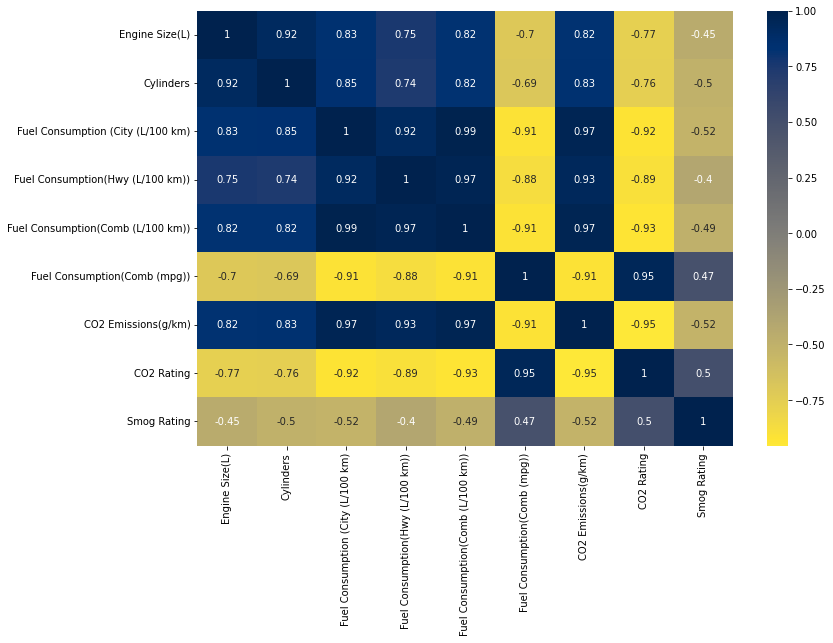

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(['Model Year'], axis = 1).corr(), cmap="cividis_r", annot = True);

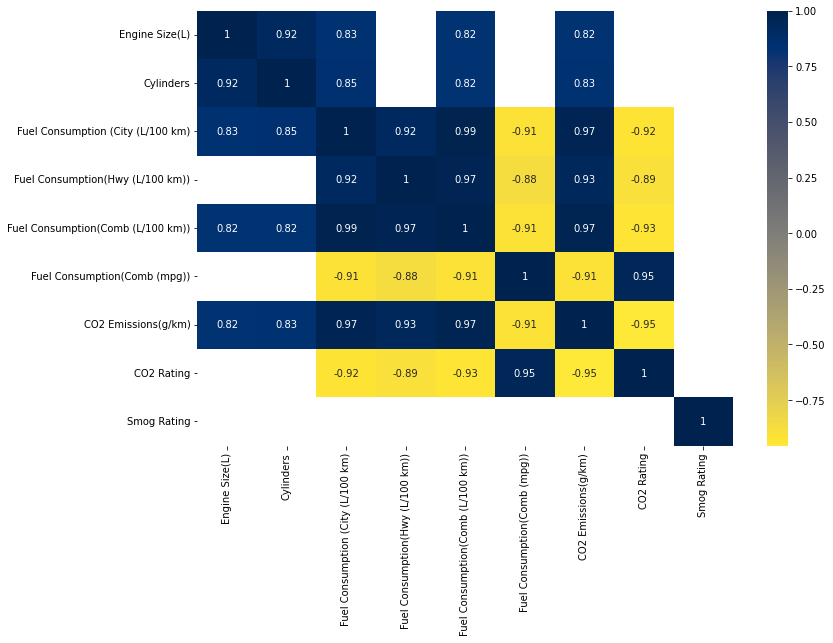

In [20]:
corr = df.drop(['Model Year'], axis = 1).corr()
corr_top = corr[abs(corr)>=.8]
plt.figure(figsize=(12,8))
sns.heatmap(corr_top, cmap="cividis_r", annot = True);

**P-value:**

In statistical analysis P-value is used to know the significance of the correlation estimate.The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.
By convention, when the
* p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.
* p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.
* p-value is $<$ 0.1: there is weak evidence that the correlation is significant.
* p-value is $>$ 0.1: there is no evidence that the correlation is significant.

This information is obtained using "stats" module in the "scipy" library.

In [21]:
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient of Cylinders vs CO2 Emissions is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['CO2 Emissions(g/km)'])
print("The Pearson Correlation Coefficient of Engine Size vs CO2 Emissions is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Cylinders'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient of Cylinders vs  Combined City & Highway Fuel Consumption is", pearson_coef, " with a P-value of P =", p_value)
pearson_coef, p_value = stats.pearsonr(df['Engine Size(L)'], df['Fuel Consumption(Comb (L/100 km))'])
print("The Pearson Correlation Coefficient Engine Size vs Combined City & Highway Fuel Consumption is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient of Cylinders vs CO2 Emissions is 0.833240570133112  with a P-value of P = 3.6276159873873733e-245
The Pearson Correlation Coefficient of Engine Size vs CO2 Emissions is 0.8241875694085823  with a P-value of P = 2.4338710526790506e-235
The Pearson Correlation Coefficient of Cylinders vs  Combined City & Highway Fuel Consumption is 0.8217180823738502  with a P-value of P = 9.314329241215394e-233
The Pearson Correlation Coefficient Engine Size vs Combined City & Highway Fuel Consumption is 0.8186935336201379  with a P-value of P = 1.198288656221755e-229


**Conclusion:** 

Since the p-value is < 0.001, all inter correlations between Cylinders, Engine Size, City Fuel Consumption and CO2 Emissions are statistically significant, and their linear relationship are also extremely strong (>0.80)

#### **Box Plots**
A box plot is a way of statistically representing the distribution of the data through five main dimensions:
* Minimun: Smallest number in the dataset.
* First quartile: Middle number between the minimum and the median.
* Second quartile (Median): Middle number of the (sorted) dataset.
* Third quartile: Middle number between median and maximum.
* Maximum: Highest number in the dataset.


##### **Vehicle Class Vs CO2 Emissions**

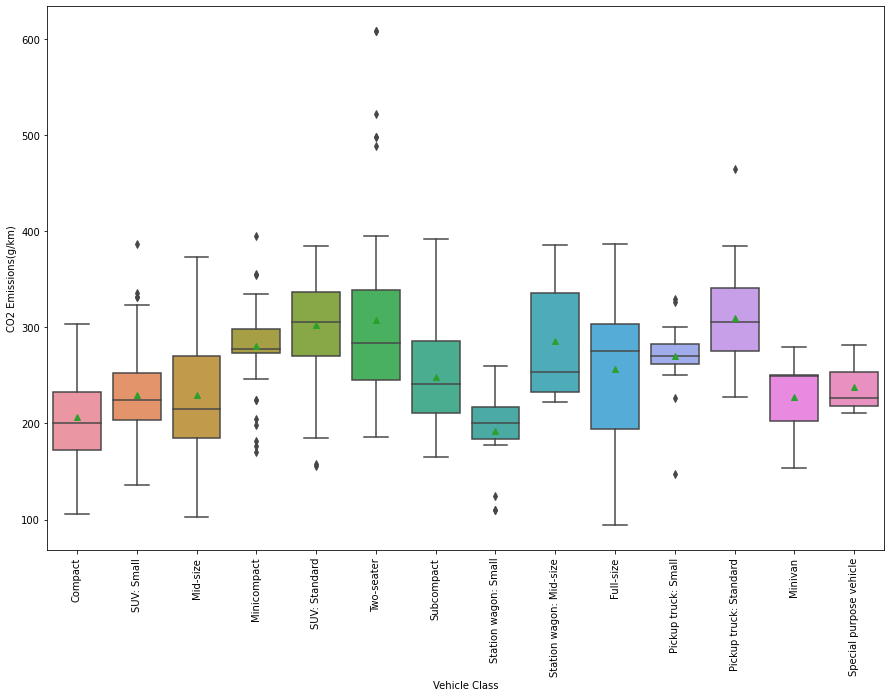

In [22]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df,showmeans=True);

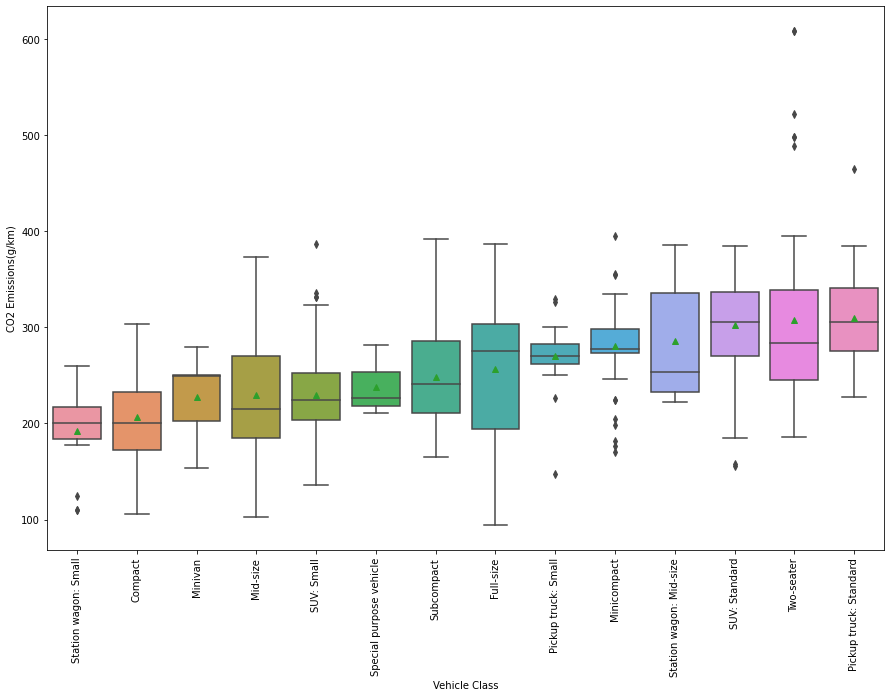

In [23]:
sorted = df[['Vehicle Class', 'CO2 Emissions(g/km)']].groupby("Vehicle Class").mean()
sorted = sorted.sort_values('CO2 Emissions(g/km)')
sorted_index = sorted.index
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df,showmeans=True, order=sorted_index);

##### **Vehicle Class Vs Combined City & Highway Fuel Consumption**

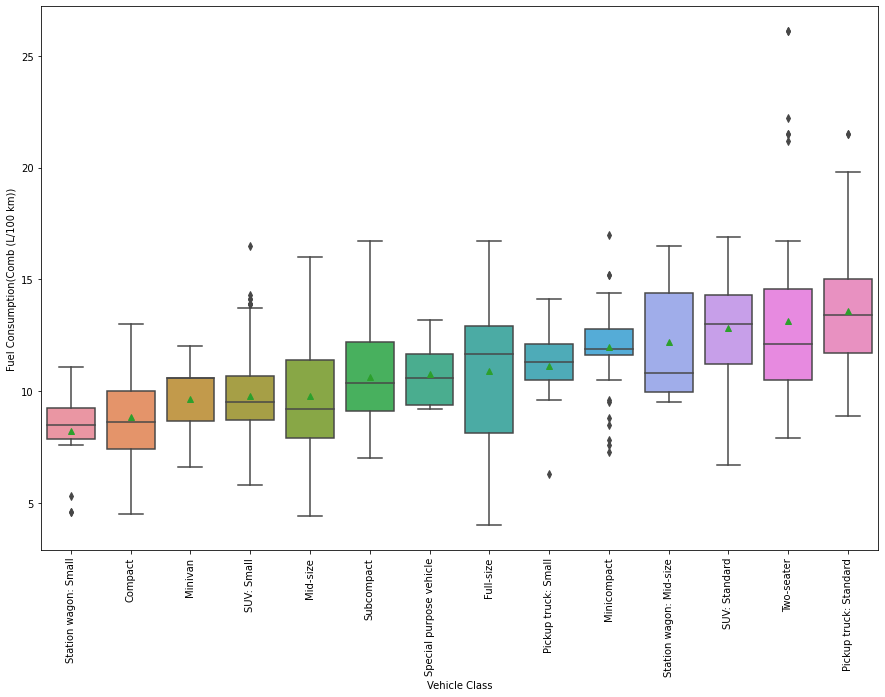

In [24]:
sorted = df[['Vehicle Class', 'Fuel Consumption(Comb (L/100 km))']].groupby("Vehicle Class").mean()
sorted = sorted.sort_values('Fuel Consumption(Comb (L/100 km))')
sorted_index = sorted.index
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.boxplot(x="Vehicle Class", y="Fuel Consumption(Comb (L/100 km))", data=df,showmeans=True, order=sorted_index);

#### **ANOVA: Analysis of Variance**
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA can be used to find the correlation between different groups of a categorical variable. 

ANOVA returns two parameters:

* F-test score: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. The F-test calculates the ratio of variation between groups means over the variation within each of the sample group means.  A larger score means there is a larger difference between the means.
* P-value: P-value tells how statistically significant is our calculated score value.
If the emission variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.
Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.


##### **Cylinders Vs CO2 Emissions**

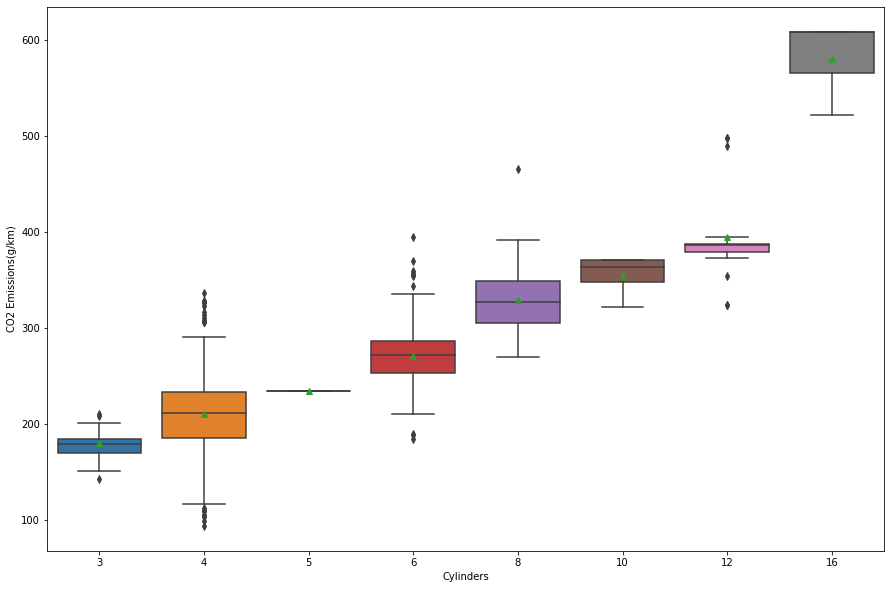

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Cylinders", y="CO2 Emissions(g/km)", data=df,showmeans=True);

In [26]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Cylinders'] == 3],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 4],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 5],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 6],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 8],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 10],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 12],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 16])

F_onewayResult(statistic=321.2813100475542, pvalue=4.589761627416592e-244)

A large F test score in CO2 Emissions vs Cylinders showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. 

In [27]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Cylinders'] == 3],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 16])

F_onewayResult(statistic=874.050688878219, pvalue=3.32452781962158e-19)

In [28]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Cylinders'] == 6],
               df['CO2 Emissions(g/km)'][df['Cylinders'] == 8])

F_onewayResult(statistic=428.67632447662686, pvalue=6.98803257820752e-69)

##### **Fuel Type Vs CO2 Emissions**

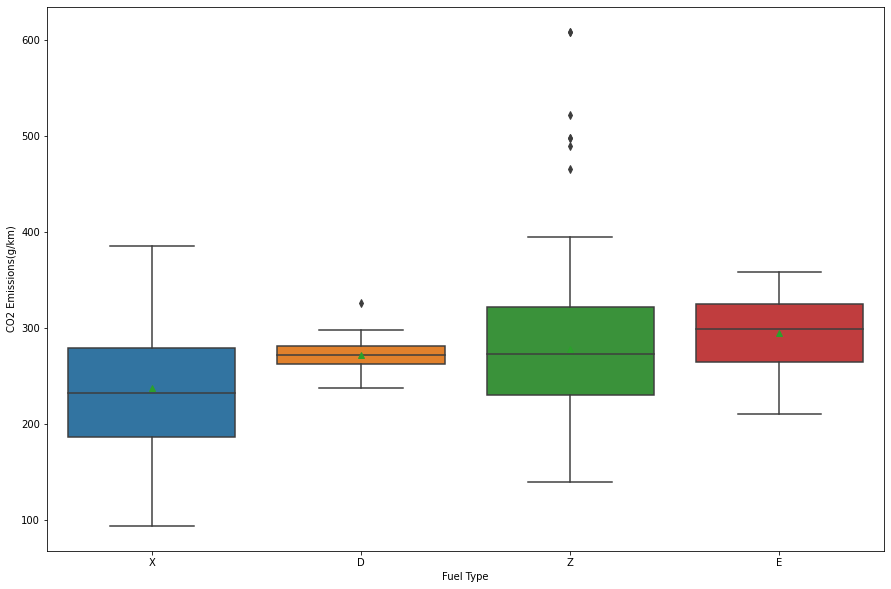

In [29]:
sorted = df[['Fuel Type', 'CO2 Emissions(g/km)']].groupby("Fuel Type").mean()
sorted = sorted.sort_values('CO2 Emissions(g/km)')
sorted_index = sorted.index
plt.figure(figsize=(15,10))
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=df,showmeans=True, order=sorted_index);

In [30]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'X'],
               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'D'],
               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'Z'],
               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'E'])

F_onewayResult(statistic=35.48640509656308, pvalue=9.88191995336441e-22)

In [31]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'X'],
               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'E'])

F_onewayResult(statistic=11.635431082401071, pvalue=0.0007044084771900461)

In [32]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'D'],
               df['CO2 Emissions(g/km)'][df['Fuel Type'] == 'Z'])

F_onewayResult(statistic=0.33087960541601835, pvalue=0.5654089094518961)

##### **Fuel Type Vs Combined City & Highway Fuel Consumption**

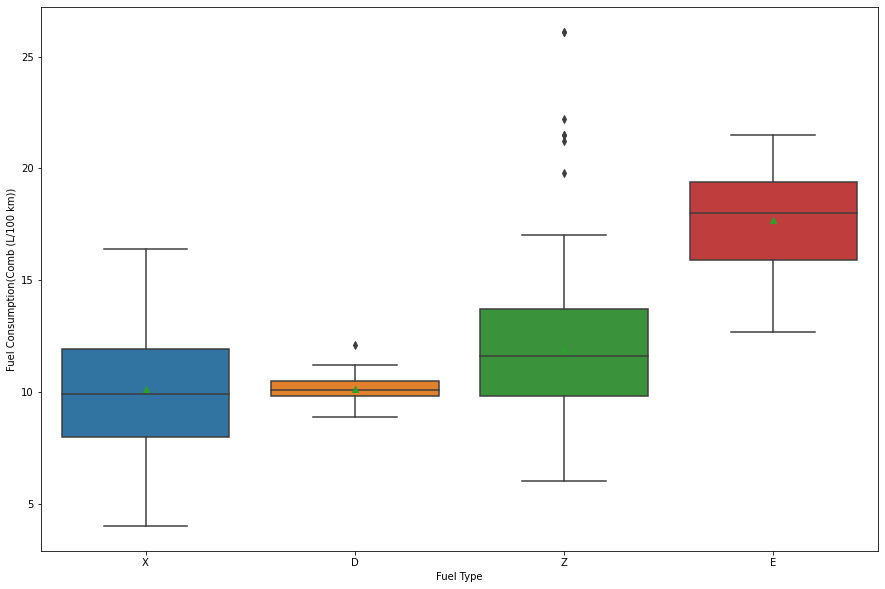

In [33]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Fuel Type", y="Fuel Consumption(Comb (L/100 km))", data=df,showmeans=True, order=sorted_index);

In [34]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'X'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'D'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'Z'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'E'])

F_onewayResult(statistic=65.34018094901431, pvalue=2.1920897177077466e-38)

In [35]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'X'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'E'])

F_onewayResult(statistic=110.19374589310341, pvalue=3.034646341035104e-23)

In [36]:
# ANOVA
# Use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.
stats.f_oneway(df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'D'],
               df['Fuel Consumption(Comb (L/100 km))'][df['Fuel Type'] == 'Z'])

F_onewayResult(statistic=12.402523362459322, pvalue=0.00046935004647786745)

##### **Cylinders Vs Combined City & Highway Fuel Consumption**

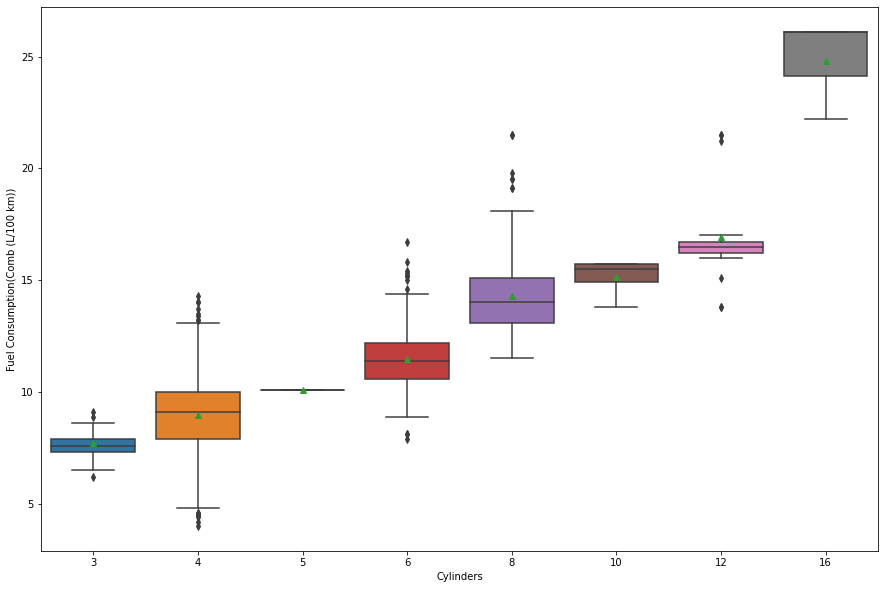

In [37]:
plt.figure(figsize=(15,10))
sns.boxplot(x="Cylinders", y="Fuel Consumption(Comb (L/100 km))", data=df,showmeans=True);

In [38]:
df.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

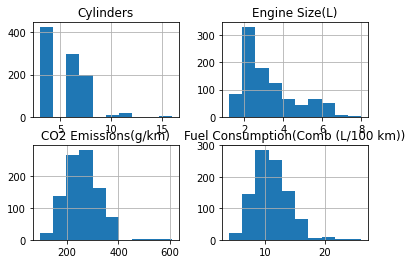

In [39]:
viz = df[['Cylinders','Engine Size(L)','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))']]
viz.hist()
plt.show()

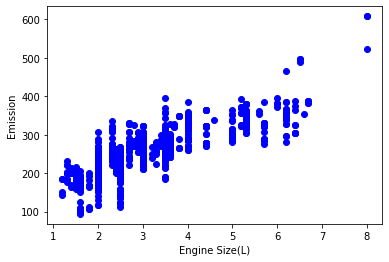

In [40]:
plt.scatter(df['Engine Size(L)'], df['CO2 Emissions(g/km)'],  color='blue')
plt.xlabel("Engine Size(L)")
plt.ylabel("Emission")
plt.show()

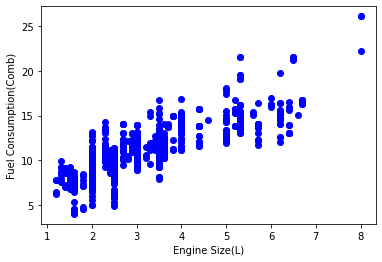

In [41]:
plt.scatter(df['Engine Size(L)'], df['Fuel Consumption(Comb (L/100 km))'],  color='blue')
plt.xlabel("Engine Size(L)")
plt.ylabel("Fuel Consumption(Comb)")
plt.show()

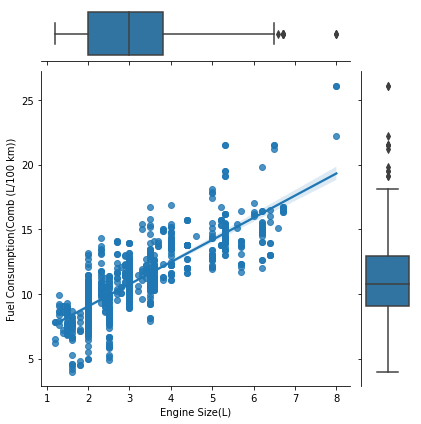

In [42]:
g = sns.JointGrid(x="Engine Size(L)", y='Fuel Consumption(Comb (L/100 km))', data=df)
g = g.plot(sns.regplot, sns.boxplot)

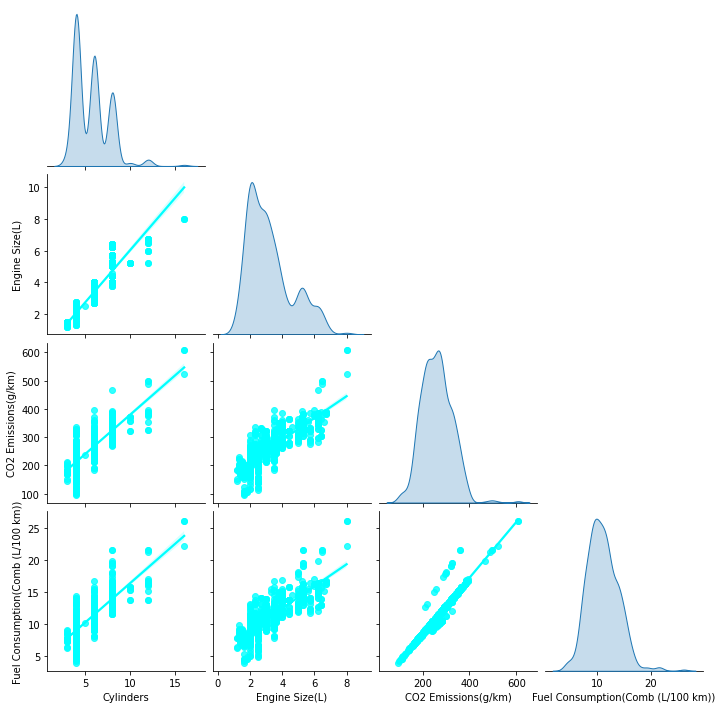

In [43]:
sns.pairplot(data = df, vars=['Cylinders','Engine Size(L)','CO2 Emissions(g/km)','Fuel Consumption(Comb (L/100 km))'], 
             kind ='reg', diag_kind="kde", plot_kws={'color':'#00ffff'},corner=True);

## **Model Development: Simple Linear Regression**<a name="Model"></a>
Simple Linear Regression is a method to understand the relationship between two variables:
* The predictor/independent variable (X)
* The response/dependent variable (that we want to predict)(Y)
The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.
$$
 Y: Response \ Variable\\
 X: Predictor \ Variables
$$

<b>Linear function:</b>
$$
Yhat = a + b  X
$$
<ul>
* a refers to the intercept of the regression line0, in other words: the value of Y when X is 0
* b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit

### **Building the Linear Regression Model**


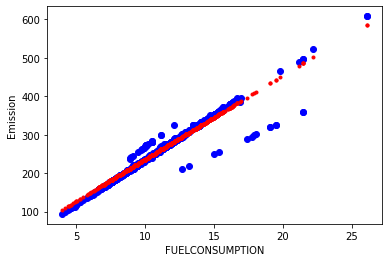

In [44]:
#Load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
X = df[['Fuel Consumption(Comb (L/100 km))']]
y = df['CO2 Emissions(g/km)']
lm.fit (X, y)
plt.scatter(X, y,  color='blue')
plt.plot(X, lm.coef_*X + lm.intercept_, '.r')
plt.xlabel("FUELCONSUMPTION")
plt.ylabel("Emission")
plt.show()

In [45]:
#The value of the intercept (a)
print(lm.intercept_)
#The value of the Slope (b)
print(lm.coef_)


17.6939141145848
[21.77035931]


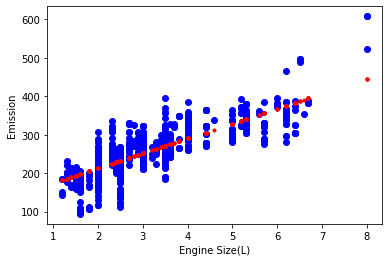

In [46]:
#Load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
X = df[['Engine Size(L)']]
y = df['CO2 Emissions(g/km)']
lm.fit (X, y)
plt.scatter(X, y,  color='blue')
plt.plot(X, lm.coef_*X + lm.intercept_, '.r')
plt.xlabel("Engine Size(L)")
plt.ylabel("Emission")
plt.show()

In [47]:
#The value of the intercept (a)
print(lm.intercept_)
#The value of the Slope (b)
print(lm.coef_)

135.59562745687725
[38.63302592]


A final linear model with the structure should be obtained:

Yhat=a+bX

Plugging in the actual values to obtain the linear function.

CO2 Emissions(g/km) = 135.60 + 38.63 x Engine Size(L)


### **Building model using train and test datasets created after Train/Test Split**
Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit. It is important that the model developed have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. 
One way to improve out-of-sample accuracy is to use an evaluation approach called Train/Test Split. Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive to train with the training set and test with the testing set. This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

This means that he outcome of each data point in this dataset is known, making it great to test with! And since this data has not been used to train the model, the model has no knowledge of the outcome of these data points. So, in essence, it is truly an out-of-sample testing.

Split the entire dataset into 80% for training, and the 20% for testing. Create a mask to select random rows using np.random.rand() function:

In [48]:
msk = np.random.rand(len(df)) < 0.8
msk[0:20]

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False])

In [49]:
train = df[msk]
test = df[~msk]
train.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
5,2022,Acura,TLX SH-AWD A-SPEC,Compact,2.0,4,AS10,Z,11.3,8.1,9.8,29,231,5,7


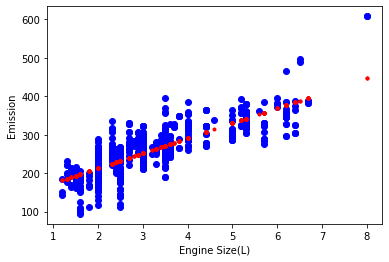

In [50]:
#Load the modules for linear regression
from sklearn.linear_model import LinearRegression
#Create the linear regression object
lm = LinearRegression()
X = train[['Engine Size(L)']]
y = train['CO2 Emissions(g/km)']
lm.fit (X, y)
plt.scatter(X, y,  color='blue')
plt.plot(X, lm.coef_*X + lm.intercept_, '.r')
plt.xlabel("Engine Size(L)")
plt.ylabel("Emission")
plt.show()

## Model Evaluation<a name="Evaluation"></a>
Model evaluation is done by comparing the predicted values with the actual values and  the difference is used to calculate the accuracy of a regression model. 

There are different methods of model evaluation metrics as follows: 
<ul>
    <li> Mean absolute error: It is the mean of the absolute value of the errors.</li>
    <li> Mean Squared Error (MSE): Mean Squared Error (MSE) is the mean of the squared error. It’s more popular than Mean absolute error because the focus is geared more towards large errors. This is due to the squared term exponentially increasing larger errors in comparison to smaller ones.</li>
    <li> Root Mean Squared Error (RMSE): This is the square root of the Mean Square Error. </li>
    <li> Residual: The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). 
    <li> Total sum of squares (tss): Sum of squares of difference between the mean value and the actual value.
    <li> Residual sum of squares (rss): Sum of residuals squared
    <li> R-squared is not error, but is a popular metric for accuracy of your model. It represents how close the data are to the fitted regression line. The higher the R-squared, the better the model fits your data. Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).</li>
    
    R-squared: 1 - (rss/tss)
</ul>

In [51]:
X_test = test[['Engine Size(L)']]
y_test = test['CO2 Emissions(g/km)']
Yhat_lm = lm.predict(X_test)
k = X_test.shape[1]
n = len(X_test)

from sklearn import metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score, r2_score
print('Mean Absolute Error(MAE) of Simple Linear regression:', metrics.mean_absolute_error(y_test, Yhat_lm))
print('Mean Squared Error(MSE) of Simple Linear regression:', metrics.mean_squared_error(y_test, Yhat_lm))
print('Root Mean Squared Error (RMSE) of Simple Linear regression:', np.sqrt(metrics.mean_squared_error(y_test, Yhat_lm)))
print('Explained Variance Score (EVS) of Simple Linear regression:',explained_variance_score(y_test, Yhat_lm))
print('R2 of Simple Linear regression:',metrics.r2_score(y_test, Yhat_lm))
print('R2 rounded of Simple Linear regression:',(metrics.r2_score(y_test, Yhat_lm)).round(2))
r2 = r2_score(y_test, Yhat_lm)
r2_rounded = r2_score(y_test, Yhat_lm).round(2)
adjusted_r2 = (1- (1-r2)*(n-1)/(n-k-1)).round(3)
print('Adjusted_r2 of Simple Linear regression: ', (1- (1-r2)*(n-1)/(n-k-1)).round(3))
accuracy = lm.score(X_test, y_test)
print("Accuracy of Simple Linear regression: {}".format(accuracy))

Mean Absolute Error(MAE) of Simple Linear regression: 29.265516096526078
Mean Squared Error(MSE) of Simple Linear regression: 1444.6015264949624
Root Mean Squared Error (RMSE) of Simple Linear regression: 38.0079139982052
Explained Variance Score (EVS) of Simple Linear regression: 0.6587074610417567
R2 of Simple Linear regression: 0.6586035693838345
R2 rounded of Simple Linear regression: 0.66
Adjusted_r2 of Simple Linear regression:  0.657
Accuracy of Simple Linear regression: 0.6586035693838345
